<a href="https://colab.research.google.com/github/spannozzo/udemi-deep-learning/blob/main/udemi_course_ex1_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/spannozzo/udemi-deep-learning.git


Cloning into 'udemi-deep-learning'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 24 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), 2.21 MiB | 5.23 MiB/s, done.


In [2]:
import pandas as pd;

df = pd.read_csv('/content/udemi-deep-learning/Churn_Modelling.csv')


In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [71]:
df2 = df.copy()

In [72]:
df2.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [73]:
df2.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [74]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [62]:
df2['Age_bin'] = pd.cut(df2['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 100], labels=False)

In [63]:
df2['Balance_to_Salary'] = df2['Balance'] / df2['EstimatedSalary']

In [64]:
df2 = pd.get_dummies(df2, columns=['Geography', 'Gender'])

In [65]:
df3 = df2.copy()

In [69]:
df3.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Age_bin',
       'Balance_to_Salary', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [70]:
df3.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bin,Balance_to_Salary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,3,0.000000,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,3,0.744677,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,1.401375,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,2,0.000000,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,3,1.587055,0,0,1,1,0


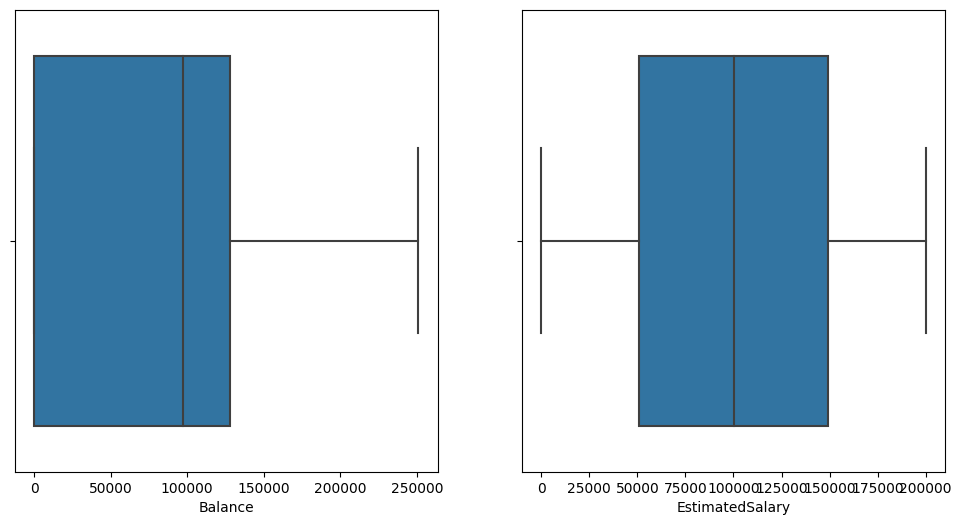

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Balance'])
plt.subplot(1, 2, 2)
sns.boxplot(x=df['EstimatedSalary'])
plt.show()


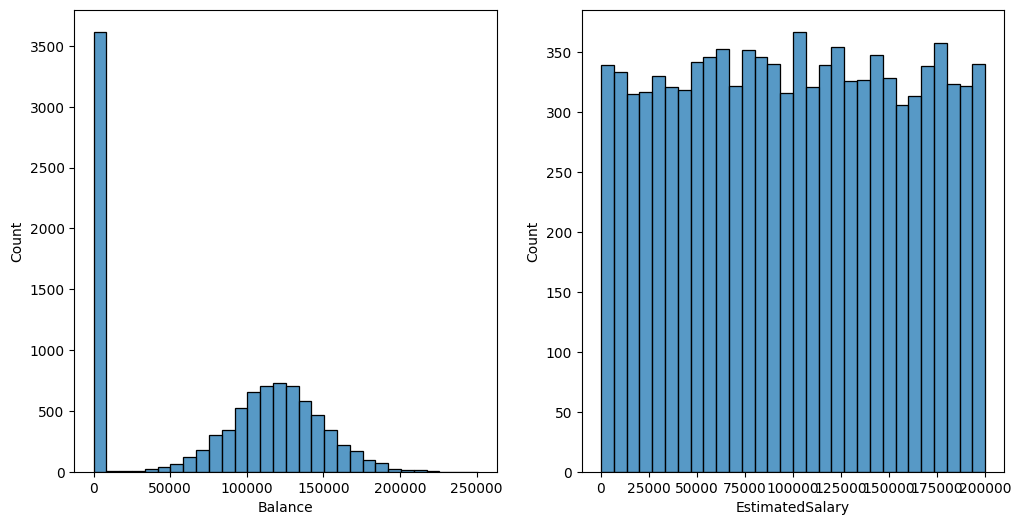

In [76]:
# Histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Balance'], bins=30)
plt.subplot(1, 2, 2)
sns.histplot(df['df[]'], bins=30)
plt.show()

In [81]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [133]:
def balance_range(x):
    if x < 0:
        return 'Negative Balance'
    elif x == 0:
        return 'Zero Balance'
    elif x <= 1000:
        return 'Low Balance'
    elif x <= 97198.54:
        return 'Medium Balance'
    elif x <= 127644.24:
        return 'High Balance'
    else:
        return 'Very High Balance'

df3['BalanceRange'] = df['Balance'].apply(balance_range)

In [122]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [135]:
bins = [0, 51002.11, 100193.92, 149388.25, np.inf]
names = ['Low Salary', 'Below Average Salary', 'Above Average Salary', 'High Salary']
df['SalaryRange'] = pd.cut(df['EstimatedSalary'], bins, labels=names)

In [136]:
df3.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bin,Balance_to_Salary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,BalanceRange,SalaryRange
0,619,42,2,0.00,1,1,1,101348.88,1,3,0.000000,1,0,0,1,0,Zero Balance,Above Average Salary
1,608,41,1,83807.86,1,0,1,112542.58,0,3,0.744677,0,0,1,1,0,Medium Balance,Above Average Salary
2,502,42,8,159660.80,3,1,0,113931.57,1,3,1.401375,1,0,0,1,0,Very High Balance,Above Average Salary
3,699,39,1,0.00,2,0,0,93826.63,0,2,0.000000,1,0,0,1,0,Zero Balance,Below Average Salary
4,850,43,2,125510.82,1,1,1,79084.10,0,3,1.587055,0,0,1,1,0,High Balance,Below Average Salary


In [137]:
df3.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Age_bin              0
Balance_to_Salary    0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
BalanceRange         0
SalaryRange          0
dtype: int64

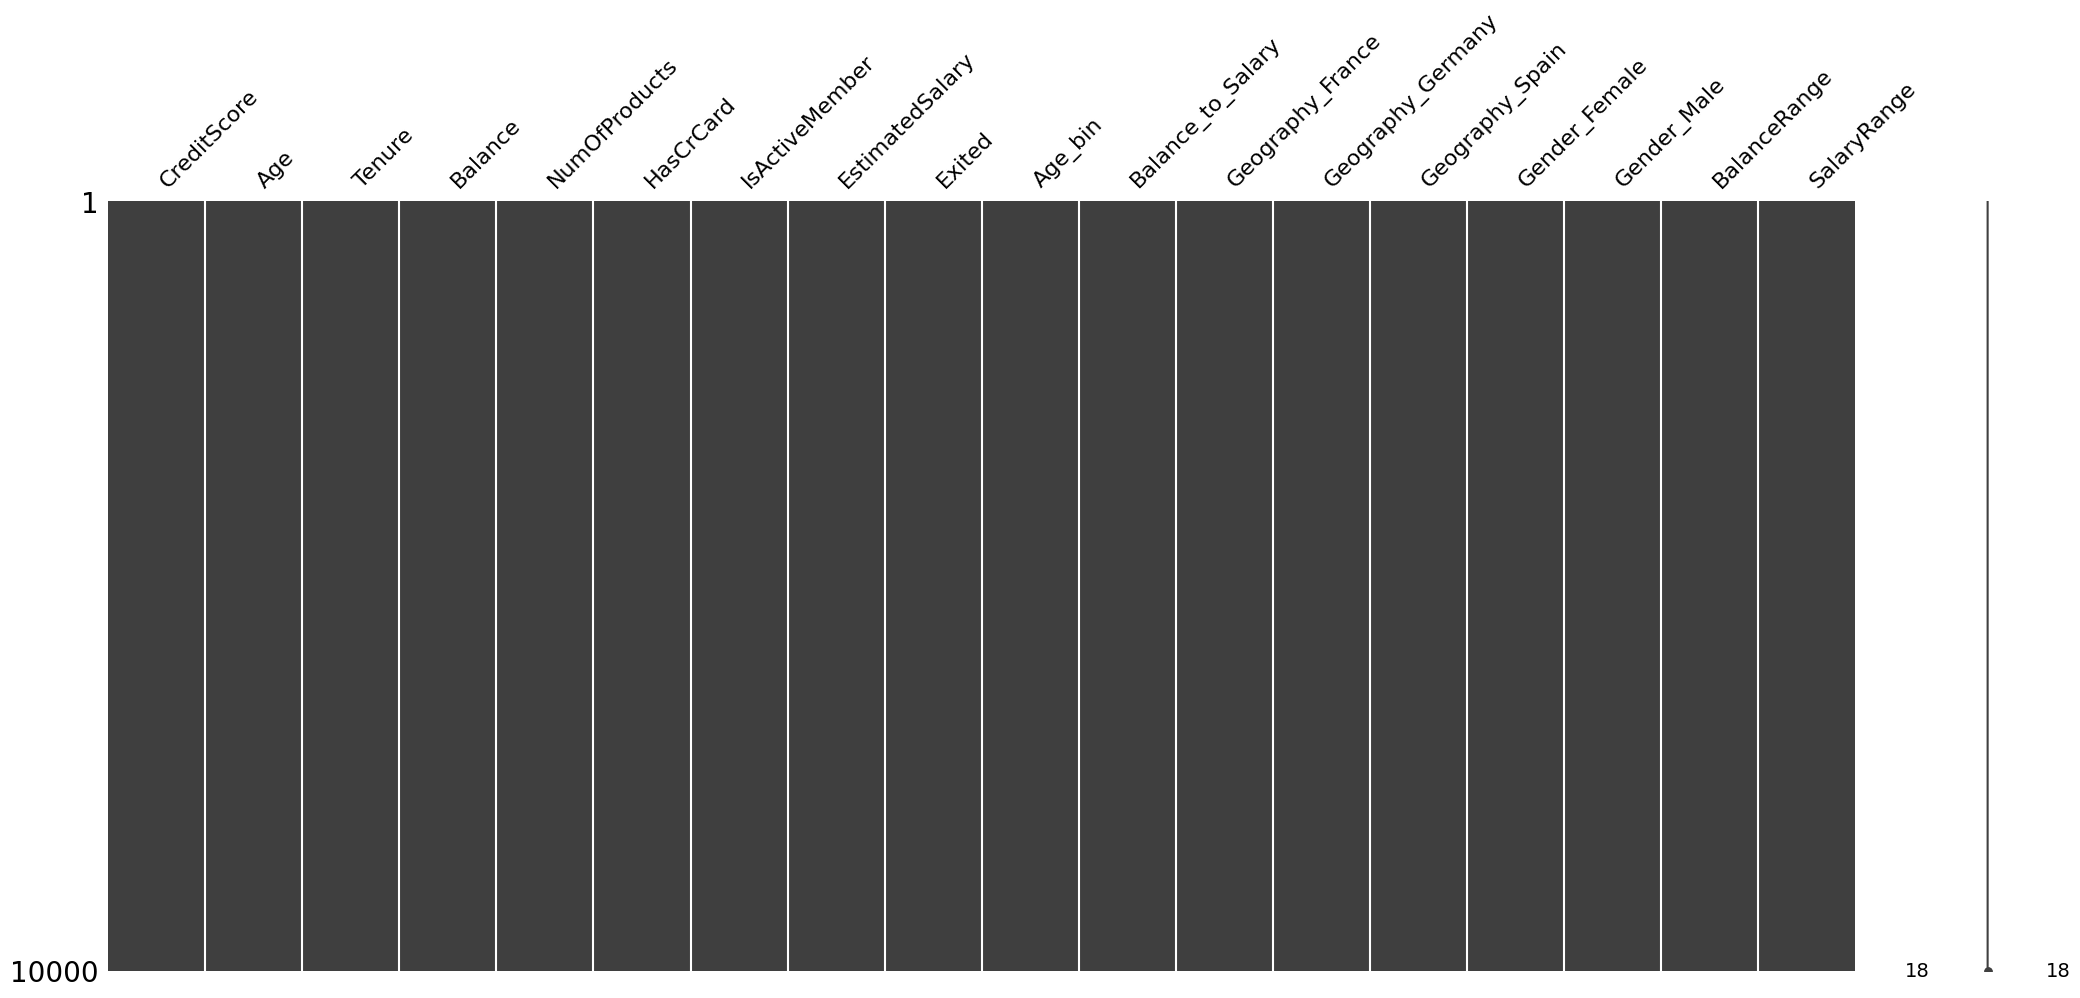

In [138]:
import missingno as msno

msno.matrix(df3)
plt.show()

In [139]:
df3.to_csv('/content/udemi-deep-learning/Churn_Modelling_normalized.csv', index=False)